# Librerías y Configuración

In [447]:
from IPython.display import display                             # Liberia para imprimir variables
import sympy as sp                                              # Librería de calculo simbólico
import numpy as np                                              # Librería de calculo numérico
import matplotlib.pyplot as plt                                 # Librería de gráficas
sp.init_printing(use_unicode = True, use_latex="mathjax")       # Print en LateX

# Planteamiento de ecuaciones

### Variables Simbólicas

In [448]:
# Parámetros
l_2 = sp.symbols("l__2")                                        # Longitud del eslabón 2
l_3 = sp.symbols("l__3")                                        # Longitud del eslabón 3
theta_2_0 = sp.symbols('\\theta__2_0')                          # Angulo inicial del eslabón 2
theta_3_0 = sp.symbols("\\theta__3_0")                          # Angulo inicial del eslabón 3
omega_2 = sp.symbols("omega__2")                                # Velocidad angular del eslabón 2
omega_3 = sp.symbols("omega__3")                                # Velocidad angular del eslabón 3

## Incógnitas (q)
R_1_x, R_1_y, theta_1 = sp.symbols('R^1_x R^1_y theta__1')      # Eslabón 1
R_2_x, R_2_y, theta_2 = sp.symbols("R^2_x R^2_y theta__2")      # Eslabón 2
R_3_x, R_3_y, theta_3 = sp.symbols("R^3_x R^3_y theta__3")      # Eslabón 3
# Vector columna q
q = sp.Matrix([R_1_x, R_1_y, theta_1, R_2_x, R_2_y, theta_2, R_3_x, R_3_y, theta_3])

## Incógnitas (q_punto)
R_1_x_diff, R_1_y_diff, theta_1_diff = sp.symbols(r"\dot{R^1_x} \dot{R^1_y} \dot{\theta^1}")      # Eslabón 1
R_2_x_diff, R_2_y_diff, theta_2_diff = sp.symbols(r"\dot{R^2_x} \dot{R^2_y} \dot{\theta^2}")      # Eslabón 2
R_3_x_diff, R_3_y_diff, theta_3_diff = sp.symbols(r"\dot{R^3_x} \dot{R^3_y} \dot{\theta^3}")      # Eslabón 3
# Vector columna q_punto
q_diff = sp.Matrix([R_1_x_diff, R_1_y_diff, theta_1_diff, R_2_x_diff, R_2_y_diff, theta_2_diff, R_3_x_diff,
                    R_3_y_diff, theta_3_diff])

# Variable de tiempo
t = sp.symbols("t")

# Imprimir tupla con todas variables para verificar su correcta representación.
l_2, l_3, theta_2_0, theta_3_0, omega_2, omega_3, t,q, q_diff


⎛                                       ⎡ R¹ₓ  ⎤  ⎡ \dot{R_x}__1  ⎤⎞
⎜                                       ⎢      ⎥  ⎢               ⎥⎟
⎜                                       ⎢R_y__1⎥  ⎢ \dot{R_y}__1  ⎥⎟
⎜                                       ⎢      ⎥  ⎢               ⎥⎟
⎜                                       ⎢  θ¹  ⎥  ⎢\dot{\theta__1}⎥⎟
⎜                                       ⎢      ⎥  ⎢               ⎥⎟
⎜                                       ⎢ R²ₓ  ⎥  ⎢ \dot{R_x}__2  ⎥⎟
⎜                                       ⎢      ⎥  ⎢               ⎥⎟
⎜l², l³, \theta²₀, \theta³₀, ω², ω³, t, ⎢R_y__2⎥, ⎢ \dot{R_y}__2  ⎥⎟
⎜                                       ⎢      ⎥  ⎢               ⎥⎟
⎜                                       ⎢  θ²  ⎥  ⎢\dot{\theta__2}⎥⎟
⎜                                       ⎢      ⎥  ⎢               ⎥⎟
⎜                                       ⎢ R³ₓ  ⎥  ⎢ \dot{R_x}__3  ⎥⎟
⎜                                       ⎢      ⎥  ⎢               ⎥⎟
⎜                                 

In [449]:
# Ecuaciones de Juntas: (igualadas a 0)
## Junta Fija
e1 = R_1_x
e2 = R_1_y
e3 = theta_1

## Junta R2
e4 = R_2_x - ((l_2/2) * sp.cos(theta_2))
e5 = R_2_y - ((l_2/2) * sp.sin(theta_2))

## Junta R3
e6 = R_2_x + ((l_2/2) * sp.cos(theta_2)) - R_3_x + ((l_3/2) * sp.cos(theta_3))
e7 = R_2_y + ((l_2/2) * sp.sin(theta_2)) - R_3_y + ((l_3/2) * sp.sin(theta_3))

## Ecuaciones de gobierno para ambas juntas
e8 = theta_2 - theta_2_0 - (omega_2*t)
e9 = theta_3 - theta_3_0 - (omega_3*t)

# Imprimir tupla con ecuaciones para verificar
e1, e2, e3, e4, e5, e6, e7, e8, e9

⎛                       l²⋅cos(θ²)           l²⋅sin(θ²)              l²⋅cos(θ²
⎜R¹ₓ, R_y__1, θ¹, R²ₓ - ──────────, R_y__2 - ──────────, R²ₓ - R³ₓ + ─────────
⎝                           2                    2                       2    

)   l³⋅cos(θ³)                    l²⋅sin(θ²)   l³⋅sin(θ³)                     
─ + ──────────, R_y__2 - R_y__3 + ────────── + ──────────, -\theta²₀ - ω²⋅t + 
        2                             2            2                          

                         ⎞
θ², -\theta³₀ - ω³⋅t + θ³⎟
                         ⎠

### Matrices de Calculo

In [450]:
## Posición:
# Vector de ecuaciones de restricción
C = sp.Matrix([e1, e2, e3, e4, e5, e6, e7, e8, e9])
# Matriz Jacobiana
C_q = C.jacobian(q)

## Velocidad:
# Derivada temporal de vector de ecuaciones de restricción
C_t = C.diff(t)

## Aceleración:
# Derivada temporal de segundo orden del vector de ecuaciones de restricción
C_t_t = C_t.diff(t)
# Derivada temporal de la matriz Jacobiana
C_q_t = C_q.diff(t)
# Jacobiana del producto de la matriz Jacobiana original por el vector de velocidades
C_q_times_q_diff = (C_q*q_diff).jacobian(q)

Qd = -(C_q_times_q_diff*q_diff) -(2*C_q_t*q_diff) -(C_t_t)

C, C_q, C_t, C_t_t, C_q_t, C_q_times_q_diff, Qd

⎛                                                                             
⎜                                                                             
⎜⎡                   R¹ₓ                   ⎤  ⎡1  0  0  0  0       0        0 
⎜⎢                                         ⎥  ⎢                               
⎜⎢                 R_y__1                  ⎥  ⎢0  1  0  0  0       0        0 
⎜⎢                                         ⎥  ⎢                               
⎜⎢                   θ¹                    ⎥  ⎢0  0  1  0  0       0        0 
⎜⎢                                         ⎥  ⎢                               
⎜⎢                  l²⋅cos(θ²)             ⎥  ⎢                l²⋅sin(θ²)     
⎜⎢            R²ₓ - ──────────             ⎥  ⎢0  0  0  1  0   ──────────   0 
⎜⎢                      2                  ⎥  ⎢                    2          
⎜⎢                                         ⎥  ⎢                               
⎜⎢                    l²⋅sin(θ²)           ⎥  ⎢     

# Calculo numérico

### Parámetros

In [451]:
# Lista con parámetros del mecanismo
mechanism_parameters = [ # Eslabón 2
                        (l_2, 400),                     # Distancia en mm
                        (theta_2_0, sp.pi/3),           # Angulo inicial 60°
                        (omega_2, sp.pi/4),             # 45°/s
                        # Eslabón 3
                        (l_3, 300),                     # Distancia en mm
                        (theta_3_0, sp.pi/6),           # Angulo inicial 30° (-30° relativo al eslabón 2)
                        (omega_3, -sp.pi/2 + sp.pi/4)]  # -45°/s (-90°/s relativa a l eslabón 3)


## Parámetros de simulación
max_iter = 10           # Numero de iteraciones
max_error = 1e-8        # Error admisible
steps = 100             # Numero de muestras por segundo
time = 1                # Tiempo de simulación en segundos


### Remplazar parámetros en matrices

In [452]:

C = C.subs(mechanism_parameters)
C_q = C_q.subs(mechanism_parameters)
C_t = C_t.subs(mechanism_parameters)
Qd = Qd.subs(mechanism_parameters)

C, C_q, C_t, Qd

⎛⎡                    R¹ₓ                    ⎤                                
⎜⎢                                           ⎥                                
⎜⎢                  R_y__1                   ⎥  ⎡1  0  0  0  0       0        
⎜⎢                                           ⎥  ⎢                             
⎜⎢                    θ¹                     ⎥  ⎢0  1  0  0  0       0        
⎜⎢                                           ⎥  ⎢                             
⎜⎢             R²ₓ - 200⋅cos(θ²)             ⎥  ⎢0  0  1  0  0       0        
⎜⎢                                           ⎥  ⎢                             
⎜⎢           R_y__2 - 200⋅sin(θ²)            ⎥  ⎢0  0  0  1  0  200⋅sin(θ²)   
⎜⎢                                           ⎥  ⎢                             
⎜⎢   R²ₓ - R³ₓ + 200⋅cos(θ²) + 150⋅cos(θ³)   ⎥, ⎢0  0  0  0  1  -200⋅cos(θ²)  
⎜⎢                                           ⎥  ⎢                             
⎜⎢R_y__2 - R_y__3 + 200⋅sin(θ²) + 150⋅sin(θ³)⎥  ⎢0  

### Aplicación de método de Newton-Raphson

In [453]:
# Numero de incógnitas
q_size = q.shape[0]

# Variables de almacenamiento de resultados (cada tiempo es una fila)
q_result = np.zeros((steps + 1, q_size))
q_diff_result = np.zeros((steps + 1, q_size))
q_diff2_result = np.zeros((steps + 1, q_size))
time_vector = np.zeros((steps + 1, 1))

# Valores iniciales
q_values = np.array([1, -4, 10, 90, 150, np.pi/4, 300, 400, np.pi/6]).reshape(-1,1)
q_diff_values = np.zeros((q_size, 1))

# Lista de valores de q y q_diff
q_values_list =  np.vstack((np.column_stack([q, q_values]), [t, 0]))
q_diff_values_list = np.column_stack([q_diff, q_diff_values])




# Posición:    C_q(t,q)*deltaQ  = -C(t)           <- Newton-Raphson
# Velocidad:   C_q(t,q)*q_diff  = -C_t(t)         <- Sistema de ecuaciones lineales
# Aceleración: C_q(t,q)*q_diff2 = Qd(q, q_diff)   <- Sistema de ecuaciones lineales

for step in range(steps+1):
    i: int = 0
    current_error: int = 1
    # tomar valores de q de la iteración anterior
    # if step > 0:
    #     q_values_list[:,1] = q_result[:,step-1]

    while(i<max_iter and current_error > max_error):

        # Construir lista de valores de q
        q_values_list[0:q_size,1] = q_values.reshape(-1)
        q_values_list[q_size,1] = (time/steps) * step

        # Calcular las matrices de coeficientes y Constantes
        coefficients_matrix = np.array(C_q.subs(q_values_list)).astype(np.float64)
        constants_vector = np.array(C.subs(q_values_list)).astype(np.float64)

        # Calcular delta
        delta_q = np.linalg.solve(coefficients_matrix, -constants_vector)

        # Calcular nuevo q
        q_values = q_values + delta_q

        # Calcular error máximo
        current_error = np.linalg.norm(constants_vector)

        i = i + 1

    # Construir lista de valores de q
    q_values_list[0:q_size,1] = q_values.reshape(-1)

    ## Velocidades
    constants_vector = np.array(C_t.subs((q_values_list))).astype(np.float64)
    q_diff_values = np.linalg.solve(coefficients_matrix, -constants_vector)

    # Construir lista de valores de q_diff
    q_diff_values_list[:,1] = q_diff_values.reshape(-1)

    ## Aceleraciones
    constants_vector = np.array(Qd.subs(np.vstack((q_values_list,q_diff_values_list)))).astype(np.float64)
    q_diff2_values = np.linalg.solve(coefficients_matrix, constants_vector)



    # Guardar resultado de la iteración
    time_vector[step] = (time/steps) * step
    q_result[step] = q_values.reshape(-1)
    q_diff_result[step] = q_diff_values.reshape(-1)
    q_diff2_result[step] = q_diff2_values.reshape(-1)
    # Print Time, Index, Error
    print("Time: ", (time/steps) * step, ", Iteration: ", i,", Error: ", current_error)




# sp.Matrix(coefficients_matrix), sp.Matrix(constants_vector), sp.Matrix(delta_q), sp.Matrix(q_result[steps-1])


Time:  0.0 , Iteration:  3 , Error:  5.859297762115582e-14
Time:  0.01 , Iteration:  3 , Error:  3.1776630612279174e-14
Time:  0.02 , Iteration:  3 , Error:  5.317219779719652e-14
Time:  0.03 , Iteration:  3 , Error:  4.0194371318792303e-14
Time:  0.04 , Iteration:  3 , Error:  5.317216697976537e-14
Time:  0.05 , Iteration:  3 , Error:  5.859292956319009e-14
Time:  0.06 , Iteration:  3 , Error:  3.4809439376889227e-14
Time:  0.07 , Iteration:  3 , Error:  2.8421731251277616e-14
Time:  0.08 , Iteration:  3 , Error:  2.8421728790118985e-14
Time:  0.09 , Iteration:  3 , Error:  4.263263842729823e-14
Time:  0.1 , Iteration:  3 , Error:  7.246148569075272e-14
Time:  0.11 , Iteration:  3 , Error:  3.8263920178529775e-14
Time:  0.12 , Iteration:  3 , Error:  3.480939241859243e-14
Time:  0.13 , Iteration:  3 , Error:  2.561905907043434e-14
Time:  0.14 , Iteration:  3 , Error:  3.256121436540263e-14
Time:  0.15 , Iteration:  3 , Error:  7.10543520506803e-15
Time:  0.16 , Iteration:  3 , Error: 

In [454]:
print(np.rad2deg(float(q_values[8][0])))
print(np.rad2deg(float(q_diff_values[8][0])))


sp.Matrix(q_values.T[0])

-15.000000000000002
-45.0


⎡        0         ⎤
⎢                  ⎥
⎢        0         ⎥
⎢                  ⎥
⎢        0         ⎥
⎢                  ⎥
⎢-51.7638090205041 ⎥
⎢                  ⎥
⎢ 193.185165257814 ⎥
⎢                  ⎥
⎢ 1.83259571459405 ⎥
⎢                  ⎥
⎢ 41.361255902352  ⎥
⎢                  ⎥
⎢ 347.547473750249 ⎥
⎢                  ⎥
⎣-0.261799387799149⎦

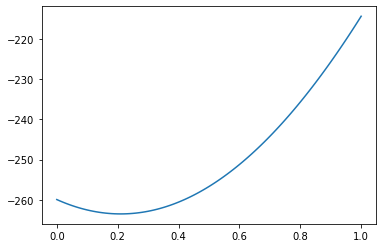

In [459]:
fig, ax = plt.subplots()
x = time_vector
y = q_diff2_result[:,7].T
ax.plot(x, y, linewidth=1.5)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()